<a href="https://colab.research.google.com/github/NSR9/EVA4/blob/master/S8/S8_mainFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import torchvision

In [2]:
# mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to our library in default search path
import sys
sys.path.append('/content/drive/My Drive/S7_final')

In [4]:
# Apply Image Transforms

import data_transform as dt
import numpy as np
from torchvision import transforms

tl = dt.DataTransformandLoad()

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
trainloader, testloader = tl.TransformAndLoad(mean1 = channel_means,stdev1 = channel_stdevs)

                                       

Files already downloaded and verified
Files already downloaded and verified


Files already downloaded and verified
Files already downloaded and verified
truck  frog truck   car


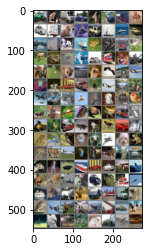

In [5]:
# let us see some images
import ViewData

ViewData.getTrainImages()

In [6]:
# Model Summary

import cifar10_models as models # drive
import resnet as rsnet
!pip install torchsummary
from torchsummary import summary


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = models.cfarResNet(False).to(device)
model =  rsnet.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [7]:

import execute # this is to train & test the model
import data_transform

model = rsnet.ResNet18().to(device)


 # this object, model of Net() class is passed onto Test_Train() object model's method train & test
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=15)

model1 = execute.Test_Train()
EPOCHS = 15
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler)
  model1.test(model, device, testloader,"model.pt")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3763980865478516 Batch_id=390 Accuracy=45.94: 100%|██████████| 391/391 [00:32<00:00, 12.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0188).  Saving model ...

Test set: Average loss: 0.0188, Accuracy: 4058/10000 (40.58%)

EPOCH: 2


Loss=0.9191964864730835 Batch_id=390 Accuracy=63.65: 100%|██████████| 391/391 [00:32<00:00, 12.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0188 --> 0.0092).  Saving model ...

Test set: Average loss: 0.0092, Accuracy: 6353/10000 (63.53%)

EPOCH: 3


Loss=0.5359134078025818 Batch_id=390 Accuracy=74.13: 100%|██████████| 391/391 [00:31<00:00, 12.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0092 --> 0.0067).  Saving model ...

Test set: Average loss: 0.0067, Accuracy: 7139/10000 (71.39%)

EPOCH: 4


Loss=0.6578503847122192 Batch_id=390 Accuracy=79.90: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0067 --> 0.0060).  Saving model ...

Test set: Average loss: 0.0060, Accuracy: 7537/10000 (75.37%)

EPOCH: 5


Loss=0.4235406517982483 Batch_id=390 Accuracy=83.91: 100%|██████████| 391/391 [00:32<00:00, 12.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0060 --> 0.0051).  Saving model ...

Test set: Average loss: 0.0051, Accuracy: 7924/10000 (79.24%)

EPOCH: 6


Loss=0.3129207193851471 Batch_id=390 Accuracy=86.61: 100%|██████████| 391/391 [00:31<00:00, 12.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0051 --> 0.0045).  Saving model ...

Test set: Average loss: 0.0045, Accuracy: 8202/10000 (82.02%)

EPOCH: 7


Loss=0.333508163690567 Batch_id=390 Accuracy=89.78: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0045 --> 0.0040).  Saving model ...

Test set: Average loss: 0.0040, Accuracy: 8424/10000 (84.24%)

EPOCH: 8


Loss=0.14550408720970154 Batch_id=390 Accuracy=91.97: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8408/10000 (84.08%)

EPOCH: 9


Loss=0.10158993303775787 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [00:31<00:00, 12.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8500/10000 (85.00%)

EPOCH: 10


Loss=0.15876993536949158 Batch_id=390 Accuracy=95.56: 100%|██████████| 391/391 [00:31<00:00, 12.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8484/10000 (84.84%)

EPOCH: 11


Loss=0.17825493216514587 Batch_id=390 Accuracy=96.95: 100%|██████████| 391/391 [00:31<00:00, 12.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8669/10000 (86.69%)

EPOCH: 12


Loss=0.03445559740066528 Batch_id=390 Accuracy=98.48: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8715/10000 (87.15%)

EPOCH: 13


Loss=0.03262872248888016 Batch_id=390 Accuracy=99.22: 100%|██████████| 391/391 [00:31<00:00, 12.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8755/10000 (87.55%)

EPOCH: 14


Loss=0.029544567689299583 Batch_id=390 Accuracy=99.65: 100%|██████████| 391/391 [00:31<00:00, 12.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8775/10000 (87.75%)

EPOCH: 15


Loss=0.009976351633667946 Batch_id=390 Accuracy=99.82: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s]



Test set: Average loss: 0.0048, Accuracy: 8774/10000 (87.74%)



In [0]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")